# An implementation of the k-Means algorithm using GreedyKCenters Algorithm 

In [2]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rd

from sklearn.metrics.pairwise import euclidean_distances

In [3]:
data1 = pd.read_csv("C:/Users/Karthik/Desktop/IE_529/clustering.csv", header = None)
data2 = pd.read_csv("C:/Users/Karthik/Desktop/IE_529/ShapedData.csv", header = None)


In [4]:
def greedy_kcenters( data1, k ):
    

    copy = data1.copy()    
    Init_center = copy.sample( 1 )
    copy.drop(Init_center.index,inplace = True)
    copy.index = list(range( copy.shape[0] ) )
    
    while Init_center.shape[0] < k:
        
        #Get index of data point that has maximum minimum distance from any center
        ind = np.argmax(np.amin( euclidean_distances(copy, Init_center), axis=1 ))
        
        #Append data in temp_df at index ind into C
        Init_center = Init_center.append( copy.loc[ind] )
        
        #Remove that row from temp_df
        copy.drop(ind,inplace = True)
        #and change indices to 0,1,2,...,n-1
        copy.index = list( range( copy.shape[0] ) )
    del copy
    return( Init_center, np.amax(np.amin(euclidean_distances( data1, Init_center ), axis=1 )) )

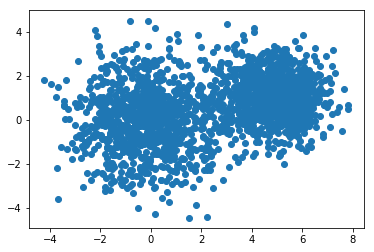

In [5]:
plt.scatter(data1[0],data1[1])
plt.show()

In [6]:
centers, dist_cost = greedy_kcenters( data1, 2 )
print("Centers:", pd.DataFrame(centers))
print("Cost:", dist_cost)

Centers:            0       1
1388  3.8464  2.2586
642  -3.6773 -3.5965
Cost: 6.33764293251


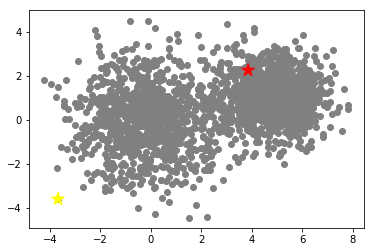

In [7]:
plt.scatter(data1[0], data1[1], color = 'grey')
plt.scatter(centers[0],centers[1], marker = "*", color = ['red', 'yellow'], s =180)
plt.show()

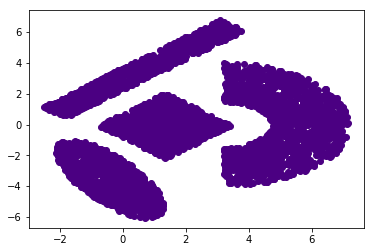

In [8]:
plt.scatter(data2[0],data2[1], color = 'indigo')
plt.show()

In [9]:
centers2, dist_cost2 = greedy_kcenters( data2, 4 )
print("Centers:", pd.DataFrame(centers2))
print("Cost:", dist_cost2)

Centers:             0        1
122   0.12568  3.25110
642   0.71578 -6.05150
1974  7.09040 -0.82791
2892 -2.07690 -1.60160
Cost: 4.79423423709


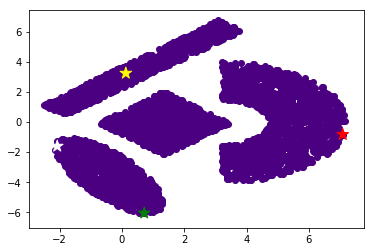

In [11]:
norm = plt.Normalize()
plt.scatter(data2[0], data2[1], color = 'indigo')
plt.scatter(centers2[0],centers2[1], marker = "*", color = ['yellow', 'green','red','white'], s =150)
plt.show()

Centers:           0       1
13   1.8697  1.3846
641 -3.6773 -3.5965
Cost: 6.00669092514


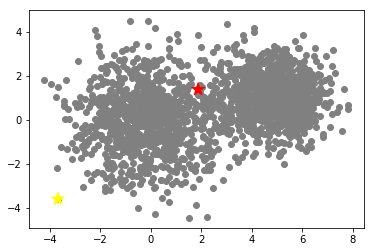

Centers:             0        1
1925  6.10020  0.73302
642  -3.67730 -3.59650
869  -0.83288  4.48190
395   2.22320 -4.42860
Cost: 4.78940383701


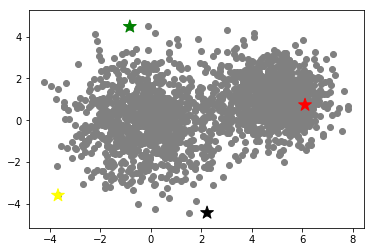

Centers:             0        1
1869  5.73600  1.86360
642  -3.67730 -3.59650
567  -2.19870  4.10880
395   2.22320 -4.42860
425   0.84854  0.25989
Cost: 3.88332010656


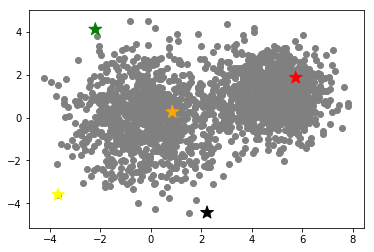

Centers:             0       1
158   1.67220 -3.0559
1727  7.19760  3.1657
566  -2.19870  4.1088
463  -3.57560 -1.2394
1363  2.55220  1.8056
1633  6.15860 -1.4323
142  -0.81813  0.8970
Cost: 3.04734986833


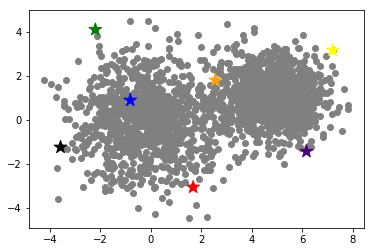

Centers:            0         1
584   1.2829 -2.184100
1727  7.1976  3.165700
567  -2.1987  4.108800
640  -3.6773 -3.596500
267   2.4498  3.073800
1633  6.1586 -1.432300
711  -2.0111  0.059256
776   3.5871  0.260160
Cost: 2.82841051131


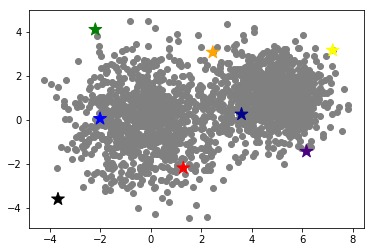

Centers:             0        1
1809  4.33620  1.96420
642  -3.67730 -3.59650
567  -2.19870  4.10880
395   2.22320 -4.42860
99   -0.12982 -0.25562
1806  7.55450 -0.49960
282  -3.44790  0.85015
1664  4.13040 -1.48880
259   1.08320  3.58370
Cost: 3.1034194383


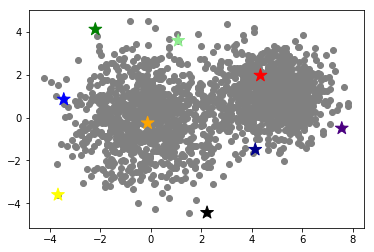

In [13]:
k = [2,4,5,7,8,9]
for i in k:
    centers, dist_cost = greedy_kcenters( data1, i )
    print("Centers:", pd.DataFrame(centers))
    print("Cost:", dist_cost)
    plt.scatter(data1[0], data1[1], color = 'grey')
    plt.scatter(centers[0],centers[1], marker = "*", color = ['red', 'yellow','green','black', 'orange','indigo', 'blue', 'darkblue', 'lightgreen', 'purple'], s =180)
    plt.show()
    

# Heuristic of SINGLE SWAP 

In [17]:
def sswap_centers( data, k ):
       
    centers,dist = greedy_kcenters( data, k )
        
    C0 = pd.DataFrame(euclidean_distances( data, centers )).min(axis=1).sum()
    print("Gk centers cost= ", C0)

    counter = centers.shape[0]
    
    beginning = False
    
    while counter > 0:
        
        for i in range( centers.shape[0] ):  
            if beginning == True:
                beginning = False
                break
                
            #Create a copy of the dataframe df without the centers Q
            copy = pd.concat( [data,centers] )
            copy.drop_duplicates(keep=False)
            copy.index = list( range( copy.shape[0] ) )
            
            #Swap
            while copy.shape[0] != 0:
                centers_new = pd.concat( [ centers.drop(centers.index[i]), copy.loc[[0]] ] )
                
                #Get cost of new centers
                Cost_new =  pd.DataFrame(euclidean_distances( data, centers_new )).min(axis=1).sum()

                #Check for reduced cost of more than gamma(which is taken to be 0.05)
                if Cost_new <= 0.95 * C0:
                    print('1')
                    centers = centers_new.copy()
                    print("SS_cost= ", Cost_new)
                    copy = pd.concat( [data,centers] )
                    copy.drop_duplicates(keep=False)
                    copy.index = list( range( copy.shape[0] ) )
                    beginning = True
                    counter = centers.shape[0] 
                    break
                else:
                    copy.drop(0, inplace=True)
                    copy.index = list( range( copy.shape[0] ) )
            if beginning == False:
                print(counter)
                counter -= 1
    
    #Return the centers
    return( centers )

In [ ]:
sscenters = sswap_centers(data1,2)

Gk centers cost=  6061.4085749571905
1
SS_cost=  5530.980519841375
1
SS_cost=  4849.300865366541
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
S

1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=

1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=

1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=

1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=

1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=

1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=

1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=

1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=

1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=

1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=

1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=  5735.110039918023
1
SS_cost=

In [ ]:
plt.scatter(data1[0], data1[1], color = 'grey')
plt.scatter(sscenters[0],sscenters[1], marker = "*", color = ['red', 'yellow'], s =180)
plt.show()

In [ ]:
sscenters2 = sswap_centers(data2,2)

In [ ]:
plt.scatter(data2[0], data2[1], color = 'grey')
plt.scatter(sscenters2[0],sscenters2[1], marker = "*", color = ['red', 'yellow'], s =180)
plt.show()